# Chapter 9: Plotting and Visualization

## 9.1 A Brief matplotlib API Primer

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
from datetime import datetime

In [ ]:
data = np.arange(10)
print(data)
plt.plot(data)

### Figures and Subplots

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.hist(np.random.standard_normal(100), bins=20, color='black', alpha=0.3)
ax2.scatter(
    np.arange(30),
    np.arange(30) + np.random.standard_normal(30),
)
ax3.plot(
    np.random.standard_normal(50).cumsum(),
    color='black',
    linestyle='dashed'
)

np.random.seed(10)
D = np.random.normal((3, 5, 4), (0.75, 1.00, 0.75), (200, 3))
ax4.violinplot(D, [2, 4, 6], widths=2,
               showmeans=False, showmedians=False, showextrema=False)

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
axes

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(
            np.random.standard_normal(500),
            bins=50,
            color='black',
            alpha=0.3)
fig.subplots_adjust(hspace=0.0, wspace=0.0)

### Colors, Markers and Line Styles

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_title('Cumulative Sum with Markers')
ax.plot(
    np.random.standard_normal(30).cumsum(),
    color='black',
    linestyle='dashed',
    marker='o')

In [ ]:
fig, ax = plt.subplots()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color='black', linestyle='dashed', label='Default')
ax.plot(data, color='red', linestyle='dashed',
        drawstyle='steps-post', label='steps-post')
ax.set_title('Cumulative Sum with Different Styles')
ax.legend()
ax.set_xlabel('Index')
ax.set_ylabel('Cumulative Sum')

### Ticks, Labels, and Legends

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(np.random.standard_normal(1000).cumsum())

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(np.random.standard_normal(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize=8)
ax.set_xlabel('Stages')
ax.set_title('My first matplotlib plot')

#### Adding legends

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(np.random.randn(1000).cumsum(), color='black', label='one')
ax.plot(np.random.randn(1000).cumsum(), color='red',
        linestyle='dashed', label='two')
ax.plot(np.random.randn(1000).cumsum(), color='blue',
        linestyle='dotted', label='three')
ax.legend(loc='best')


#### Annotations and Drawing on a Subplot

In [ ]:
fig, ax = plt.subplots()

data =pd.read_csv(r"F:\books\pydata-book-3rd-edition\examples\spx.csv",
                  index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="green", lw=2, label="S&P 500")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="red", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008–2009 financial crisis")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='black', alpha=0.5)
circ = plt.Circle((0.7, 0.2), 0.15, color='blue', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='green', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

In [ ]:
fig.savefig('figpath.svg')
fig.savefig('figpath.png', dpi=300, bbox_inches='tight')

### matplotlib Configuration

In [ ]:
plt.rc('figure', figsize=(10, 10))
plt.rc('font', family='monospace', weight='bold', size=8)

## 9.2 Plotting with pandas and seaborn

In [ ]:
s = pd.Series(np.random.standard_normal(10).cumsum(),
              index = np.arange(0, 100,10))
s.plot()

In [ ]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

plt.style.use('grayscale')
df.plot()

### Bar Plots

In [ ]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(
    np.random.uniform(size=16),
    index=list('abcdefghijklmnop')
)

data.plot.bar(ax=axes[0], color='black', alpha=0.7)
data.plot.barh(ax=axes[1], color='black', alpha=0.7)

In [ ]:
df = pd.DataFrame(
    np.random.uniform(size=(6, 4)),
    index=['one', 'two', 'three', 'four', 'five', 'six'],
    columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus')
)

print(df)
df.plot.bar()

In [ ]:
df.plot.barh(stacked=True, alpha=0.5)

In [ ]:
tips = pd.read_csv(r"F:\books\pydata-book-3rd-edition\examples\tips.csv")
tips.head(n=10)

In [ ]:
party_counts = pd.crosstab(tips['day'],  tips['size'])
party_counts

In [ ]:
party_counts = party_counts.reindex(
    index=['Thur', 'Fri', 'Sat', 'Sun'],
)
party_counts

In [ ]:
party_counts = party_counts.loc[:, 2:5]
party_counts

In [ ]:
party_pct = party_counts.div(party_counts.sum(axis='columns'), axis='index')
party_pct

In [ ]:
party_pct.plot.bar(stacked=True, alpha=0.5)

In [ ]:
tips['tip_pct'] = tips.tip / ( tips.total_bill - tips.tip)
tips.head(n=10)

In [ ]:
sns.barplot(x='tip_pct', y='day', hue='day', data=tips, orient='horizontal',)

In [ ]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='horizontal',)

In [ ]:
sns.set_style('whitegrid')
sns.set_palette('Set3')
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='horizontal')

### Histograms and Density Plots

In [ ]:
tips['tip_pct'].plot.hist(bins=50, color='black', alpha=0.3)

In [ ]:
tips['tip_pct'].plot.density()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
tips['tip_pct'].plot.density(ax=ax, color='red')
tips['tip_pct'].plot.hist(
    ax=ax, bins=50, color='black', alpha=0.3, density=True,)

In [ ]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)

values = pd.Series(np.concatenate([comp1, comp2]))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(values, bins=50, color='black', alpha=0.3, kde=True)

In [ ]:
sns.kdeplot(values, color='red')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.kdeplot(tips['tip_pct'], ax=ax, fill=True, color='black', alpha=0.3)
sns.histplot(tips['tip_pct'], ax=ax, bins = 50, fill=True, color='red', alpha=0.3)

In [ ]:
sns.histplot(
    tips['tip_pct'], bins=50, color='black', alpha=0.3, kde=True,
    stat='density', common_norm=False
)

### Scatter or Point Plots

In [ ]:
macro = pd.read_csv(r"F:\books\pydata-book-3rd-edition\examples\macrodata.csv",)
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

In [ ]:
ax = sns.regplot(x='m1', y='unemp', data=trans_data)
ax.set_title('Changes in log(m1) vs. log(unemp)')

In [ ]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet Grids and Categorical Data

In [ ]:
sns.catplot(
    x='day', y='tip_pct', hue='time', col='smoker',
    kind='bar', height=6, aspect=1.5,
    data=tips[tips.tip_pct < 1.0]  # Filter out extreme values  
)

In [ ]:
sns.catplot(x='day', y='total_bill', row='time', col='smoker',
            kind='bar', height=6, aspect=1.5,
            data=tips[tips.tip_pct < 1.0]) # Filter out extreme values)

In [ ]:
sns.catplot(x="day", y="tip_pct", row="time",
                col="smoker", hue='day',
                kind="bar", data=tips[tips.tip_pct < 1])

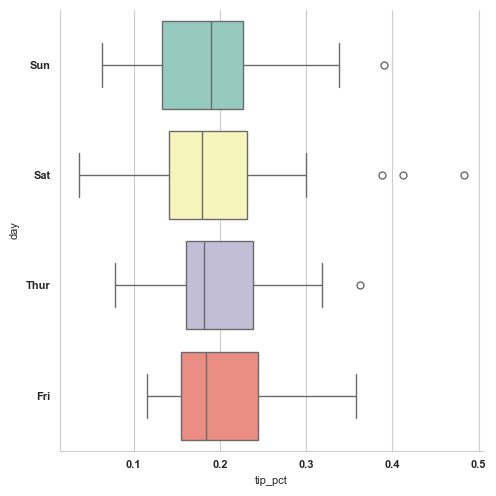

In [74]:
sns.catplot(
    x='tip_pct',
    y='day',
    kind='box',
    hue='day',
    data=tips[tips.tip_pct < 0.5],
    orient='horizontal',
)